In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [2]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.9.7


In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.layers import Dropout
from keras import regularizers

#from sklearn.model_selection import train_test_split

In [4]:
# set image size
IMAGE_SIZE = [224, 224]

In [5]:
train_dir = 'Dataset\train'
test_dir = 'Dataset\test'

In [6]:
# adding preprocessing layer to the front of VGG
Myvgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# do not train current weights
for layer in Myvgg.layers:
  layer.trainable = False

In [8]:
dir = glob('Dataset/train/*')
dir

['Dataset/train\\cardboard',
 'Dataset/train\\e-chip',
 'Dataset/train\\glass',
 'Dataset/train\\gloves',
 'Dataset/train\\masks',
 'Dataset/train\\medicines',
 'Dataset/train\\metal',
 'Dataset/train\\paper',
 'Dataset/train\\plastic',
 'Dataset/train\\trash']

### Check Number of Images in each classes for Training

In [9]:
cd/Users/SUCHAL/Desktop/Research in Computing/Thesis/Codes/Trial 2 VGG/Dataset/train

C:\Users\SUCHAL\Desktop\Research in Computing\Thesis\Codes\Trial 2 VGG\Dataset\train


In [10]:
curr_path = os.getcwd()
curr_path

'C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Trial 2 VGG\\Dataset\\train'

In [11]:
# Show the data classes
classes = os.listdir(curr_path)
classes

['cardboard',
 'e-chip',
 'glass',
 'gloves',
 'masks',
 'medicines',
 'metal',
 'paper',
 'plastic',
 'trash']

Text(0, 0.5, 'Number of Training images')

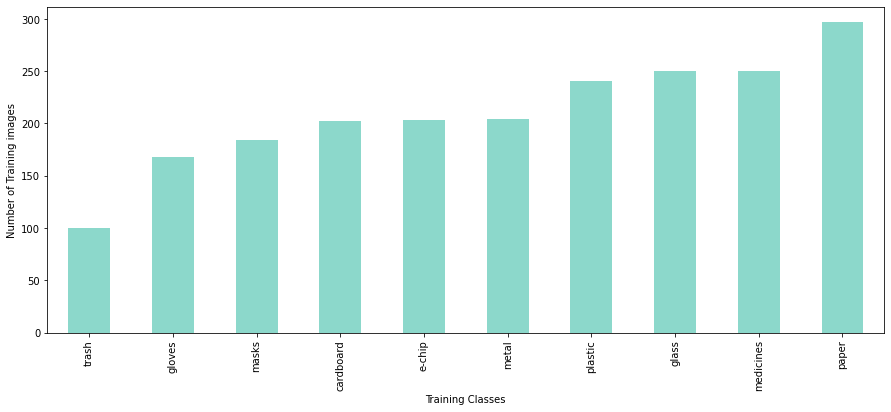

In [12]:
# number of images in each class for training datasets
import pandas as pd

data_dic = {}
for folder in os.listdir(curr_path):
    data_dic[folder] = len(os.listdir(curr_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar', color=(0.1, 0.7, 0.6, 0.5))
plt.xlabel('Training Classes')
plt.ylabel('Number of Training images')

### Check Number of Images in each classes for test

In [13]:
cd/Users/SUCHAL/Desktop/Research in Computing/Thesis/Codes/Trial 2 VGG/Dataset/test

C:\Users\SUCHAL\Desktop\Research in Computing\Thesis\Codes\Trial 2 VGG\Dataset\test


In [14]:
curr_path = os.getcwd()
curr_path

'C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Trial 2 VGG\\Dataset\\test'

Text(0, 0.5, 'Number of Valedation images')

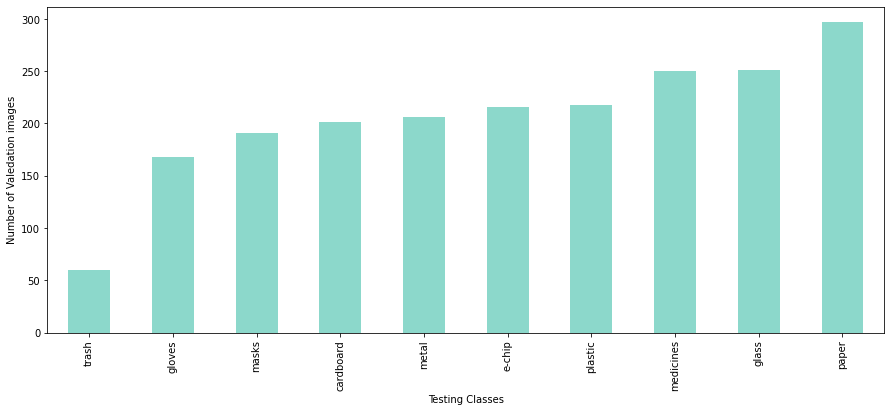

In [15]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(curr_path):
    data_dic[folder] = len(os.listdir(curr_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar', color=(0.1, 0.7, 0.6, 0.5))
plt.xlabel('Testing Classes')
plt.ylabel('Number of Valedation images')


In [16]:
Myvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
# preparing model structure
x = Flatten(name='flatten')(Myvgg.output)

In [18]:
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

In [19]:
x = Dense(4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

In [20]:
predictions= Dense(len(dir), activation='softmax', kernel_initializer='random_uniform', bias_initializer='random_uniform', bias_regularizer=regularizers.l2(0.01), name='predictions')(x)

In [21]:
# create a model object
model = Model(inputs=Myvgg.input, outputs=predictions)


In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Trial 2 VGG\\Dataset\\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Trial 2 VGG\\Dataset\\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2099 images belonging to 10 classes.
Found 2058 images belonging to 10 classes.


In [26]:
# fit the model
r = model.fit(training_set, validation_data=test_set, epochs=15, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/15
66/66 [==============================] - 568s 9s/step - loss: 3.6423 - accuracy: 0.5312 - val_loss: 16.4524 - val_accuracy: 0.3659
Epoch 2/15
66/66 [==============================] - 554s 8s/step - loss: 1.1230 - accuracy: 0.7203 - val_loss: 4.3801 - val_accuracy: 0.5554
Epoch 3/15
66/66 [==============================] - 552s 8s/step - loss: 0.7952 - accuracy: 0.7842 - val_loss: 2.3571 - val_accuracy: 0.6608
Epoch 4/15
66/66 [==============================] - 553s 8s/step - loss: 0.6766 - accuracy: 0.8113 - val_loss: 2.1002 - val_accuracy: 0.6560
Epoch 5/15
66/66 [==============================] - 553s 8s/step - loss: 0.5695 - accuracy: 0.8447 - val_loss: 2.0500 - val_accuracy: 0.6618
Epoch 6/15
66/66 [==============================] - 554s 8s/step - loss: 0.4959 - accuracy: 0.8685 - val_loss: 2.1594 - val_accuracy: 0.6812
Epoch 7/15
66/66 [==============================] - 566s 9s/step - loss: 0.5381 - accuracy: 0.8690 - val_loss: 2.2286 - val_accuracy: 0.6662
Epoch 8/15
6

In [27]:
cd/Users/SUCHAL/Desktop/Research in Computing/Thesis/Codes/Trial 2 VGG

C:\Users\SUCHAL\Desktop\Research in Computing\Thesis\Codes\Trial 2 VGG


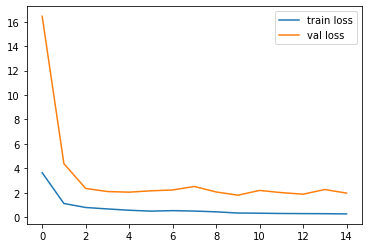

<Figure size 432x288 with 0 Axes>

In [28]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

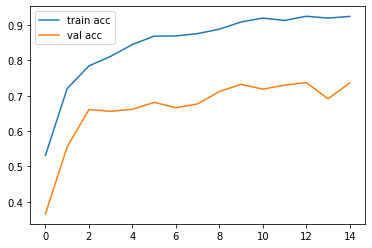

<Figure size 432x288 with 0 Axes>

In [29]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# Score
score = model.evaluate(test_set, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 1.9717488288879395
Test accuracy 0.7361515760421753


In [31]:
#Save the trained model
from tensorflow.keras.models import load_model
model.save('my_vgg16_3.h5')

In [32]:
### Prediction

In [33]:
y_pred = model.predict(test_set)

65/65 [==============================] - 302s 5s/step


In [34]:
y_pred

array([[1.3109671e-19, 2.8957411e-28, 8.9020137e-26, ..., 1.0000000e+00,
        7.8891745e-21, 6.5917874e-18],
       [2.6129667e-32, 2.9434884e-34, 2.9450481e-35, ..., 0.0000000e+00,
        1.4074901e-38, 1.7126436e-19],
       [9.9262804e-21, 1.0000000e+00, 3.9339725e-19, ..., 1.8731885e-18,
        8.3889655e-18, 2.2482616e-16],
       ...,
       [1.0083387e-07, 8.4009844e-05, 1.5358644e-08, ..., 9.0521172e-07,
        1.1401844e-16, 5.9507741e-03],
       [3.0123716e-34, 3.1207409e-35, 2.4039106e-25, ..., 0.0000000e+00,
        1.2685756e-25, 6.3594525e-28],
       [5.1233405e-03, 1.2553273e-09, 1.0797451e-06, ..., 9.9483597e-01,
        2.7235345e-09, 9.3915126e-11]], dtype=float32)

In [35]:
#from keras.preprocessing.image import load_img
from keras_preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from skimage.io import imread
from pylab import *


In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred

array([7, 5, 1, ..., 4, 5, 7], dtype=int64)

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
#Load the model
model=load_model('my_vgg16_2.h5')


In [40]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

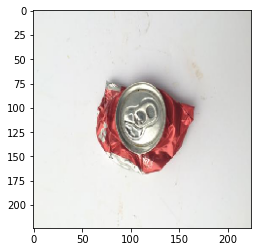

In [41]:
# Import the image for prediction
from tensorflow.keras.preprocessing import image
img=image.load_img("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Trial 2 VGG\\Dataset\\test\\metal\\metal210.jpg",target_size=(224,224))
imshow(img)

In [42]:
x=image.img_to_array(img)
x

array([[[234., 234., 234.],
        [234., 234., 234.],
        [234., 234., 234.],
        ...,
        [201., 202., 197.],
        [200., 201., 196.],
        [199., 200., 195.]],

       [[234., 234., 234.],
        [234., 234., 234.],
        [234., 234., 234.],
        ...,
        [201., 202., 197.],
        [200., 201., 196.],
        [199., 200., 195.]],

       [[234., 234., 234.],
        [234., 234., 234.],
        [234., 234., 234.],
        ...,
        [201., 202., 197.],
        [200., 201., 196.],
        [199., 200., 195.]],

       ...,

       [[240., 242., 237.],
        [240., 242., 237.],
        [240., 242., 237.],
        ...,
        [223., 225., 220.],
        [223., 225., 220.],
        [221., 223., 218.]],

       [[240., 242., 237.],
        [240., 242., 237.],
        [240., 242., 237.],
        ...,
        [223., 225., 220.],
        [223., 225., 220.],
        [221., 223., 218.]],

       [[240., 242., 237.],
        [240., 242., 237.],
        [240., 2

In [43]:
x.shape


(224, 224, 3)

In [44]:
#x=x/255

In [45]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [46]:
img_data

array([[[[130.061, 117.221, 110.32 ],
         [130.061, 117.221, 110.32 ],
         [130.061, 117.221, 110.32 ],
         ...,
         [ 93.061,  85.221,  77.32 ],
         [ 92.061,  84.221,  76.32 ],
         [ 91.061,  83.221,  75.32 ]],

        [[130.061, 117.221, 110.32 ],
         [130.061, 117.221, 110.32 ],
         [130.061, 117.221, 110.32 ],
         ...,
         [ 93.061,  85.221,  77.32 ],
         [ 92.061,  84.221,  76.32 ],
         [ 91.061,  83.221,  75.32 ]],

        [[130.061, 117.221, 110.32 ],
         [130.061, 117.221, 110.32 ],
         [130.061, 117.221, 110.32 ],
         ...,
         [ 93.061,  85.221,  77.32 ],
         [ 92.061,  84.221,  76.32 ],
         [ 91.061,  83.221,  75.32 ]],

        ...,

        [[133.061, 125.221, 116.32 ],
         [133.061, 125.221, 116.32 ],
         [133.061, 125.221, 116.32 ],
         ...,
         [116.061, 108.221,  99.32 ],
         [116.061, 108.221,  99.32 ],
         [114.061, 106.221,  97.32 ]],

        [[

In [47]:
#Predict the class
model.predict(img_data)


1/1 [==============================] - 1s 800ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [48]:
#1: cardboard, 2:e-chip, 3:glass, 4:gloves, 5:masks, 6:medicines, 7:metal, 8:paper, 9:plastic, 10:trash

In [49]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 204ms/step


In [50]:
a==1

array([False])